# Machine Learning for hotel cancellations (Final Project)

**Importing libraries**

In [417]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploratory analysis of the **features**

**Importing dataset**

In [418]:
rvas = pd.read_csv(r'../data/rvas2019.csv')

First exploration

In [419]:
rvas.head()

,Reservation No.,External Reference,Main Customer,Main client,Guest Name,Arrival date,Departure date,Room type,Room,Status,Meal plan identifier,Voucher,Rate,Creation date
0,4516548,NaN,100410,VOYAGE PRIVE FRANCIA,"KUMAR, RANJIT",27/12/2018,1/1/2019,DBLDLX,0202,Confirmed,BB,102774871VPFR,BFL_VP_O18,NaN
1,4517039,NaN,100410,VOYAGE PRIVE FRANCIA,"MESSIAEN, CHRISTOPHE",27/12/2018,1/1/2019,DBLDLX,0512,Confirmed,BB,102774411VPFR,BFL_VP_O18,NaN
2,4520747,NaN,100410,VOYAGE PRIVE FRANCIA,"PONZETTA, TAMARA",27/12/2018,3/1/2019,DBLDLX,0304,Confirmed,BB,102775553VPFR,BFL_VP_O18,NaN
3,4570451,51117470,101471,AGODA COMPANY PTE,"PEI HSUAN, WANG",27/12/2018,1/1/2019,DBLSTD,1103,Confirmed,RO,329343160,X_B_PKNR,NaN
4,4644589,51695027,100418,WIS-WELCOMEBEDS,"BASELDAHUD, NADIA",27/12/2018,2/1/2019,DBLSTD,0718,Confirmed,BB,Y3IK8P,X_BAR_NR,NaN


In [420]:
rvas.shape

(4000, 14)

In [421]:
rvas.dtypes

Reservation No.          int64
External Reference      object
Main Customer            int64
Main client             object
Guest Name              object
Arrival date            object
Departure date          object
Room type               object
Room                    object
Status                  object
Meal plan identifier    object
Voucher                 object
Rate                    object
Creation date           object
dtype: object

In [422]:
rvas.columns

Index(['Reservation No.', 'External Reference', 'Main Customer', 'Main client',
       'Guest Name', 'Arrival date', 'Departure date', 'Room type', 'Room',
       'Status', 'Meal plan identifier', 'Voucher', 'Rate', 'Creation date'],
      dtype='object')

In [423]:
rvas.isnull().sum().sort_values(ascending=False)

Creation date           2000
External Reference      1956
Room                    1641
Voucher                   32
Rate                      11
Guest Name                 5
Meal plan identifier       0
Status                     0
Room type                  0
Departure date             0
Arrival date               0
Main client                0
Main Customer              0
Reservation No.            0
dtype: int64

In [424]:
reservas = rvas.copy()

------------------------------------------------------------------------------------------------------------------------------

In [425]:
reservas = reservas.drop(columns=['External Reference', 'Main Customer',
       'Guest Name','Room','Voucher'])

In [426]:
reservas.dtypes

Reservation No.          int64
Main client             object
Arrival date            object
Departure date          object
Room type               object
Status                  object
Meal plan identifier    object
Rate                    object
Creation date           object
dtype: object

In [427]:
reservas.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date
0,4516548,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN
1,4517039,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN
2,4520747,VOYAGE PRIVE FRANCIA,27/12/2018,3/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN
3,4570451,AGODA COMPANY PTE,27/12/2018,1/1/2019,DBLSTD,Confirmed,RO,X_B_PKNR,NaN
4,4644589,WIS-WELCOMEBEDS,27/12/2018,2/1/2019,DBLSTD,Confirmed,BB,X_BAR_NR,NaN


In [428]:
reservas.isnull().sum().sort_values(ascending=False)

Creation date           2000
Rate                      11
Meal plan identifier       0
Status                     0
Room type                  0
Departure date             0
Arrival date               0
Main client                0
Reservation No.            0
dtype: int64

## Main client

Main client = we will group the reservations in 8 different categories: **Direct** , **OTA** , **Trad Travel Ag** , **TTOO** , **Corporate** , **Boxes/Flash** , **GDS** and **Last minute**. 

In [429]:
unique = reservas['Main client'].unique().tolist()

In [430]:
unique

['VOYAGE PRIVE FRANCIA',
 'AGODA COMPANY PTE',
 'WIS-WELCOMEBEDS',
 'EXPEDIA',
 'LASTMINUTE',
 'BOOKING.COM',
 'WEB H10',
 'ATRAPALO.COM,',
 'SUNHOTELS',
 'CLUB H10',
 'TOURMUNDIAL',
 'LUXAIR',
 'DIRECT',
 'TRAVEL REPUBLIC',
 'HRS',
 'DER TOURISTIK DEUTSCHLAND',
 'VOYAGE PRIVE UK',
 'TUI BELGIUM',
 'FTI TOURISTIK',
 'SECRET ESCAPES',
 'VOYAGE PRIVE ESPAÑA S.L.U.',
 'TUI NEDERLAND N.V.',
 'BONGO',
 'RED LETTER DAYS',
 'DE JONG INTRA',
 'HOTELBEDS SWITZERLAND AG',
 'TUI DEUTSCHLAND',
 'SENSATIONS DU MONDE',
 'D-FINE',
 'MIKI TRAVEL LTD.',
 'CAPITA BUSINESS TRAVEL',
 'KUONI GLOBAL TRAVEL SERVICES',
 'VOYAGE PRIVE ITALIA',
 'EUROPE EXPRESS',
 'SUNAIR VAKANTIES B.V.',
 'XXL, PULSE NIGHTCLUB',
 'TRAVELCLICK',
 'FLIGHT CENTRE UK Ltd',
 'HRS PAYMENT SOLUTIONS GMBH',
 'PREMIER BOOKING SERVICES',
 'ERICSSON',
 'LUXURY ESCAPES TRAVEL',
 'TATE',
 'TRANSAT TOURS CANADA',
 'HOTEL TONIGHT UK',
 'HILLGATE SOLUTIONS',
 'BOKU NETWORK SERVICES',
 'RTS',
 'CLICK TRAVEL',
 'IMG ARTISTS',
 'CHCS CLG',
 'CLA

In [431]:
# Market channel

otas = ['AGODA COMPANY PTE',
        'WIS-WELCOMEBEDS',
        'EXPEDIA',
        'BOOKING.COM',
        'ATRAPALO.COM,',
        'HOTELBEDS SWITZERLAND AG',
        'KUONI GLOBAL TRAVEL SERVICES',
        'RTS',
        'PRESTIGIA.COM',
        'HOTELBEDS UK',
        'DESTINIA']

trad = ['DE JONG INTRA',
        'MIKI TRAVEL LTD.',
        'SENSATIONS DU MONDE',
        'EUROPE EXPRESS',
        'SUNAIR VAKANTIES B.V.',
        'TRANSAT TOURS CANADA',
        'GATE 1 TRAVEL',
        'PLEASANT HOLIDAYS',
        'TRAVEL AGENCIES',
        'V.EL CORTE INGLES',
        'ABBEY (UK) TRAVEL LTD',
        'AIR CANADA VACATIONS',
        'LIBERATE - HOTELBEDS',
        'TRAVEL REPUBLIC',
        'HOTEL DIRECT',
        'VIAGENS ABREU',
        'JUMBO TOURS']

last = ['LASTMINUTE',
        'HOTELSCOMBINED PTY LTD.',
        'HOTEL TONIGHT UK']

ttoo = ['TUI DEUTSCHLAND',
        'TUI NEDERLAND N.V.',
        'SUNHOTELS',
        'TOURMUNDIAL',
        'LUXAIR',
        'DER TOURISTIK DEUTSCHLAND',
        'TUI BELGIUM','FTI TOURISTIK']

direct = ['WEB H10',
          'CLUB H10',
          'DIRECT']

corp = ['D-FINE',
        'CAPITA BUSINESS TRAVEL',
        'FLIGHT CENTRE UK Ltd',
        'XXL, PULSE NIGHTCLUB',
        'TATE',
        'PREMIER BOOKING SERVICES',
        'ERICSSON','HILLGATE SOLUTIONS',
        'IMG ARTISTS',
        'BOKU NETWORK SERVICES',
        'COMPANIES',
        'SOUTHBANK CENTRE LIMITED',
        'OSIRIS EDUCATIONAL WOODHALL',
        'POLAR CAPITAL PARTNERS',
        'CHCS CLG',
        'CLARITY MEDICAL SYSTEMS,',
        'EGENCIA UK',
        'RAILWAY CHILDREN',
        'LONDON SOUTHBANK UNIVERSITY',
        'PRIORITY',
        'BARINGA PARTNERS',
        'ON THE MARKET',
        'CHECK POINT SOFTWARE TECHNOLOGIES',
        'ITF',
        'ACCESS BOOKINGS',
        'MAINTEL EUROPE',
        'REDFERN TRAVEL',
        "MOVIN' MUSIC",
        'TRADEXFIRM INTERNATIONAL',
        'MACCREANOR LAVINGTON',
        'BUNDESVERWALTUNGSAMT HAMM',
        'ELEMENTA CONSULTING',
        'MARCH ON STRESS',
        'ASSOCIATION FOR PUBLIC SERVICE',
        'COMPUTACENTER',
        'THE HOSPITAL SATURDAY FUND',
        'IAPS',
        'CHARTERED INST. OF ENVIRONMENTAL HE',
        'UK POWER NETWORKS HOLDINGS',
        'IMPEX ENTERPRISES']

gds = ['TRAVELCLICK',
       'HRS PAYMENT SOLUTIONS GMBH',
       'CLICK TRAVEL',
       'HRS',
       'KEYTEL',
       'CWT GLOBAL ESPAÑA']

flash = ['VOYAGE PRIVE ITALIA',
         'RED LETTER DAYS',
         'BONGO',
         'VOYAGE PRIVE UK',
         'VOYAGE PRIVE FRANCIA',
         'SECRET ESCAPES',
         'VOYAGE PRIVE ESPAÑA S.L.U.',
         'LUXURY ESCAPES TRAVEL']


In [432]:
#check == flash + gds + corp + direct + ttoo + last + trad + otas

In [433]:
#for elem in unique:
   # if elem not in check:
       # print(elem,'.......................................Aqui esta!')
   #else:
        #print(elem,'..........................................OK')

-----

In [434]:
mainc = reservas['Main client'].tolist()

In [435]:
len(mainc)

4000

In [436]:
def channel_segmentation(df):
    
    df2 = df.copy()
    
    otas = ['AGODA COMPANY PTE',
        'WIS-WELCOMEBEDS',
        'EXPEDIA',
        'BOOKING.COM',
        'ATRAPALO.COM,',
        'HOTELBEDS SWITZERLAND AG',
        'KUONI GLOBAL TRAVEL SERVICES',
        'RTS',
        'PRESTIGIA.COM',
        'HOTELBEDS UK',
        'DESTINIA']

    trad = ['DE JONG INTRA',
        'MIKI TRAVEL LTD.',
        'SENSATIONS DU MONDE',
        'EUROPE EXPRESS',
        'SUNAIR VAKANTIES B.V.',
        'TRANSAT TOURS CANADA',
        'GATE 1 TRAVEL',
        'PLEASANT HOLIDAYS',
        'TRAVEL AGENCIES',
        'V.EL CORTE INGLES',
        'ABBEY (UK) TRAVEL LTD',
        'AIR CANADA VACATIONS',
        'LIBERATE - HOTELBEDS',
        'TRAVEL REPUBLIC',
        'HOTEL DIRECT',
        'VIAGENS ABREU',
        'JUMBO TOURS']

    last = ['LASTMINUTE',
        'HOTELSCOMBINED PTY LTD.',
        'HOTEL TONIGHT UK']

    ttoo = ['TUI DEUTSCHLAND',
        'TUI NEDERLAND N.V.',
        'SUNHOTELS',
        'TOURMUNDIAL',
        'LUXAIR',
        'DER TOURISTIK DEUTSCHLAND',
        'TUI BELGIUM','FTI TOURISTIK']

    direct = ['WEB H10',
          'CLUB H10',
          'DIRECT']

    corp = ['D-FINE',
        'CAPITA BUSINESS TRAVEL',
        'FLIGHT CENTRE UK Ltd',
        'XXL, PULSE NIGHTCLUB',
        'TATE',
        'PREMIER BOOKING SERVICES',
        'ERICSSON','HILLGATE SOLUTIONS',
        'IMG ARTISTS',
        'BOKU NETWORK SERVICES',
        'COMPANIES',
        'SOUTHBANK CENTRE LIMITED',
        'OSIRIS EDUCATIONAL WOODHALL',
        'POLAR CAPITAL PARTNERS',
        'CHCS CLG',
        'CLARITY MEDICAL SYSTEMS,',
        'EGENCIA UK',
        'RAILWAY CHILDREN',
        'LONDON SOUTHBANK UNIVERSITY',
        'PRIORITY',
        'BARINGA PARTNERS',
        'ON THE MARKET',
        'CHECK POINT SOFTWARE TECHNOLOGIES',
        'ITF',
        'ACCESS BOOKINGS',
        'MAINTEL EUROPE',
        'REDFERN TRAVEL',
        "MOVIN' MUSIC",
        'TRADEXFIRM INTERNATIONAL',
        'MACCREANOR LAVINGTON',
        'BUNDESVERWALTUNGSAMT HAMM',
        'ELEMENTA CONSULTING',
        'MARCH ON STRESS',
        'ASSOCIATION FOR PUBLIC SERVICE',
        'COMPUTACENTER',
        'THE HOSPITAL SATURDAY FUND',
        'IAPS',
        'CHARTERED INST. OF ENVIRONMENTAL HE',
        'UK POWER NETWORKS HOLDINGS',
        'IMPEX ENTERPRISES']

    gds = ['TRAVELCLICK',
       'HRS PAYMENT SOLUTIONS GMBH',
       'CLICK TRAVEL',
       'HRS',
       'KEYTEL',
       'CWT GLOBAL ESPAÑA']

    flash = ['VOYAGE PRIVE ITALIA',
         'RED LETTER DAYS',
         'BONGO',
         'VOYAGE PRIVE UK',
         'VOYAGE PRIVE FRANCIA',
         'SECRET ESCAPES',
         'VOYAGE PRIVE ESPAÑA S.L.U.',
         'LUXURY ESCAPES TRAVEL']
    
    df2['Market channel'] = np.where(df2['Main client'].isin(otas),'Online Travel agency',
             np.where(df2['Main client'].isin(trad),'Travel agency',
                      np.where(df2['Main client'].isin(last),'Last minmute app',
                               np.where(df2['Main client'].isin(ttoo),'Tour Operator',
                                        np.where(df2['Main client'].isin(corp),'Corporate/Mice',
                                                 np.where(df2['Main client'].isin(direct),'Direct reservation / Walk-in',
                                                          np.where(df2['Main client'].isin(gds),'Global Distribution Systems (GDS)',
                                                                   np.where(df2['Main client'].isin(flash),'Flash sales / Boxes','Other'))))))))
    
    #if  in otas:
    #    y = 'Online Travel agency'
    #if x in trad:
    #    y = 'Travel agency'
    #if x in last:
    #    y = 'Last minute app'
    #if x in ttoo:
    #    y = 'Tour Operator'
    #if x in corp:
    #    y = 'Corporate/Mice'        
    #if x in direct:
    #    y = 'Direct reservation / Walk-in'
    #if x in gds:
    #    y = 'Global Distribution Systems (GDS)'
    #ifx in flash:
    #    y = 'Flash sales / Boxes'
            
    return df2

reservas = channel_segmentation(reservas)

In [437]:
reservas.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date,Market channel
0,4516548,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes
1,4517039,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes
2,4520747,VOYAGE PRIVE FRANCIA,27/12/2018,3/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes
3,4570451,AGODA COMPANY PTE,27/12/2018,1/1/2019,DBLSTD,Confirmed,RO,X_B_PKNR,NaN,Online Travel agency
4,4644589,WIS-WELCOMEBEDS,27/12/2018,2/1/2019,DBLSTD,Confirmed,BB,X_BAR_NR,NaN,Online Travel agency


In [438]:
seg = reservas['Market channel'].value_counts()

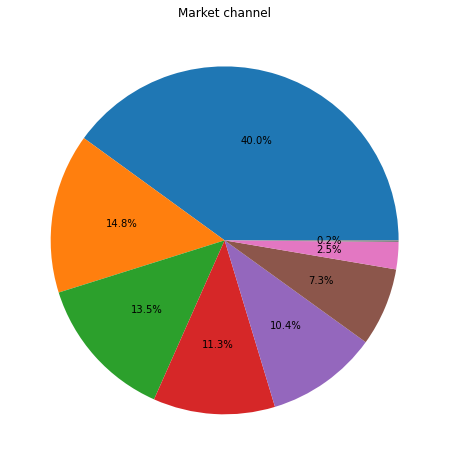

In [439]:
fg,ax = plt.subplots(figsize=(10, 8))

plt.pie(seg,autopct='%1.1f%%')
plt.title('Market channel')

plt.show()

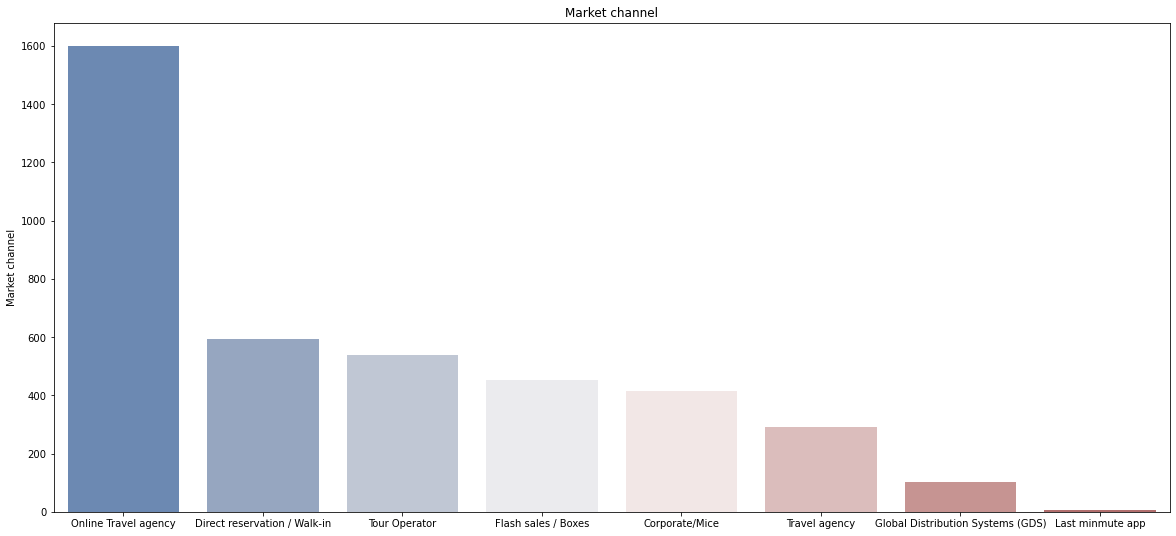

In [440]:
fg,ax = plt.subplots(figsize=(20,9))
sns.barplot(x=seg.index,y=seg,palette="vlag",capsize=5.0)
plt.title('Market channel')

plt.show()

---

## Arrival date / departure

**Lenght of the stay** = substracting the arrival date to the departure date

In [441]:
reservas.columns

Index(['Reservation No.', 'Main client', 'Arrival date', 'Departure date',
       'Room type', 'Status', 'Meal plan identifier', 'Rate', 'Creation date',
       'Market channel'],
      dtype='object')

In [442]:
reservas.dtypes

Reservation No.          int64
Main client             object
Arrival date            object
Departure date          object
Room type               object
Status                  object
Meal plan identifier    object
Rate                    object
Creation date           object
Market channel          object
dtype: object

In [443]:
reservas["Arrival date ok"]= pd.to_datetime(reservas["Arrival date"],dayfirst=True)
reservas["Departure date ok"]= pd.to_datetime(reservas["Departure date"],dayfirst=True)

reservas["Creation date ok"]= pd.to_datetime(reservas["Creation date"],dayfirst=True)

In [444]:
reservas['Arrival date']

0       27/12/2018
1       27/12/2018
2       27/12/2018
3       27/12/2018
4       27/12/2018
           ...    
3995    31/12/2019
3996    31/12/2019
3997    31/12/2019
3998    31/12/2019
3999    31/12/2019
Name: Arrival date, Length: 4000, dtype: object

In [445]:
reservas['Arrival date ok']

0      2018-12-27
1      2018-12-27
2      2018-12-27
3      2018-12-27
4      2018-12-27
          ...    
3995   2019-12-31
3996   2019-12-31
3997   2019-12-31
3998   2019-12-31
3999   2019-12-31
Name: Arrival date ok, Length: 4000, dtype: datetime64[ns]

In [446]:
reservas['Departure date']

0       1/1/2019
1       1/1/2019
2       3/1/2019
3       1/1/2019
4       2/1/2019
          ...   
3995    2/1/2020
3996    1/1/2020
3997    1/1/2020
3998    2/1/2020
3999    2/1/2020
Name: Departure date, Length: 4000, dtype: object

In [447]:
reservas['Departure date ok']

0      2019-01-01
1      2019-01-01
2      2019-01-03
3      2019-01-01
4      2019-01-02
          ...    
3995   2020-01-02
3996   2020-01-01
3997   2020-01-01
3998   2020-01-02
3999   2020-01-02
Name: Departure date ok, Length: 4000, dtype: datetime64[ns]

In [448]:
reservas.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date,Market channel,Arrival date ok,Departure date ok,Creation date ok
0,4516548,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT
1,4517039,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT
2,4520747,VOYAGE PRIVE FRANCIA,27/12/2018,3/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-03,NaT
3,4570451,AGODA COMPANY PTE,27/12/2018,1/1/2019,DBLSTD,Confirmed,RO,X_B_PKNR,NaN,Online Travel agency,2018-12-27,2019-01-01,NaT
4,4644589,WIS-WELCOMEBEDS,27/12/2018,2/1/2019,DBLSTD,Confirmed,BB,X_BAR_NR,NaN,Online Travel agency,2018-12-27,2019-01-02,NaT


In [449]:
reservas['Lenght of the stay'] = (reservas['Departure date ok'] - reservas['Arrival date ok']).dt.days

In [450]:
reservas['Lenght of the stay'].unique()

array([ 5,  7,  6,  4,  3, 10,  2,  1, 15,  9, 12, 11, 13,  8,  0, 14, 20,
       29, 17, 30, 21], dtype=int64)

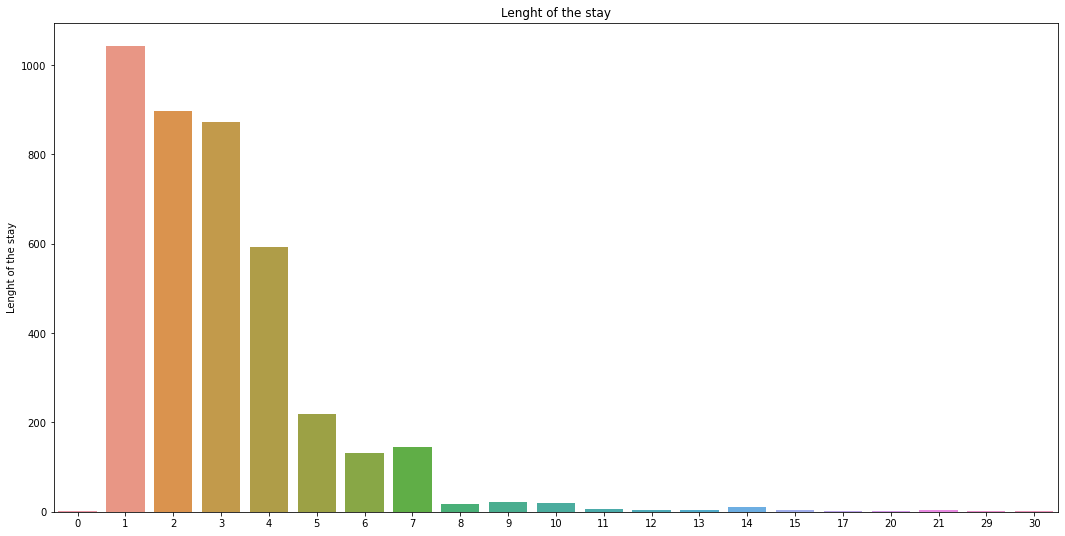

In [451]:
leng = reservas['Lenght of the stay'].value_counts()

fg,ax = plt.subplots(figsize=(18,9))

sns.barplot(x=leng.index,y=leng,capsize=7.0)
plt.title('Lenght of the stay')

plt.show()

**Weekend or not weekend**

In [452]:
reservas.dtypes

Reservation No.                  int64
Main client                     object
Arrival date                    object
Departure date                  object
Room type                       object
Status                          object
Meal plan identifier            object
Rate                            object
Creation date                   object
Market channel                  object
Arrival date ok         datetime64[ns]
Departure date ok       datetime64[ns]
Creation date ok        datetime64[ns]
Lenght of the stay               int64
dtype: object

In [453]:
reservas['Arrival_day'] = np.where(reservas['Arrival date ok'].dt.dayofweek.isin([0,1,2,3,4]),'L','W')

reservas['Departure_day'] = np.where(reservas['Departure date ok'].dt.dayofweek.isin([0,1,2,3,4]),'L','W')

reservas['Delta'] = reservas['Departure_day'] + '-' + reservas['Arrival_day']

Checking if the stay is falling on the weekend on the L-L reservations

In [455]:
leng = reservas['Lenght of the stay'].to_list()

for i in range(leng):
    if np.where(reservas['Arrival date ok'].dt.dayofweek+i in (5,6),:
        weekend = True
        

SyntaxError: invalid syntax (<ipython-input-455-7191225ac6fd>, line 3)

In [454]:
reservas.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date,Market channel,Arrival date ok,Departure date ok,Creation date ok,Lenght of the stay,Arrival_day,Departure_day,Delta
0,4516548,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT,5,L,L,L-L
1,4517039,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT,5,L,L,L-L
2,4520747,VOYAGE PRIVE FRANCIA,27/12/2018,3/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-03,NaT,7,L,L,L-L
3,4570451,AGODA COMPANY PTE,27/12/2018,1/1/2019,DBLSTD,Confirmed,RO,X_B_PKNR,NaN,Online Travel agency,2018-12-27,2019-01-01,NaT,5,L,L,L-L
4,4644589,WIS-WELCOMEBEDS,27/12/2018,2/1/2019,DBLSTD,Confirmed,BB,X_BAR_NR,NaN,Online Travel agency,2018-12-27,2019-01-02,NaT,6,L,L,L-L


In [321]:
#reservas['Arrival Day of week '] = reservas['Arrival date ok'].dt.dayofweek

In [322]:
#reservas['Arrival Day of week '] = reservas['Departure date ok'].dt.dayofweek

In [323]:
#reservas['Day of week']

In [324]:
#dayofweek = reservas['Day of week'].tolist()

In [325]:
#dayofweek

In [326]:
#len(dayofweek)

In [327]:
#for n in dayofweek:
    #print(type(n))

In [328]:
#weekend = []

#for n in dayofweek:
    #if n > 3:
        #weekend.append(str(n).replace(str(n),'Weekend'))
    #else:
        #weekend.append(str(n).replace(str(n),'Not Weekend'))
        
#print(len(weekend))

In [329]:
#reservas['Day of week'] = weekend

In [330]:
#reservas.head(50)

In [331]:
#weekend = reservas['Day of week'].value_counts()

#fg,ax = plt.subplots(figsize=(10, 8))

#plt.pie(weekend,autopct='%1.1f%%')
#plt.title('Day of the week')

#plt.show()

**Month**, in order to display the date by month

In [332]:
reservas['Arrival month'] = reservas['Arrival date ok'].dt.month

In [333]:
reservas['Arrival month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [334]:
reservas.dtypes

Reservation No.                  int64
Main client                     object
Arrival date                    object
Departure date                  object
Room type                       object
Status                          object
Meal plan identifier            object
Rate                            object
Creation date                   object
Market channel                  object
Arrival date ok         datetime64[ns]
Departure date ok       datetime64[ns]
Creation date ok        datetime64[ns]
Lenght of the stay               int64
Arrival_day                     object
Departure_day                   object
Delta                           object
Arrival month                    int64
dtype: object

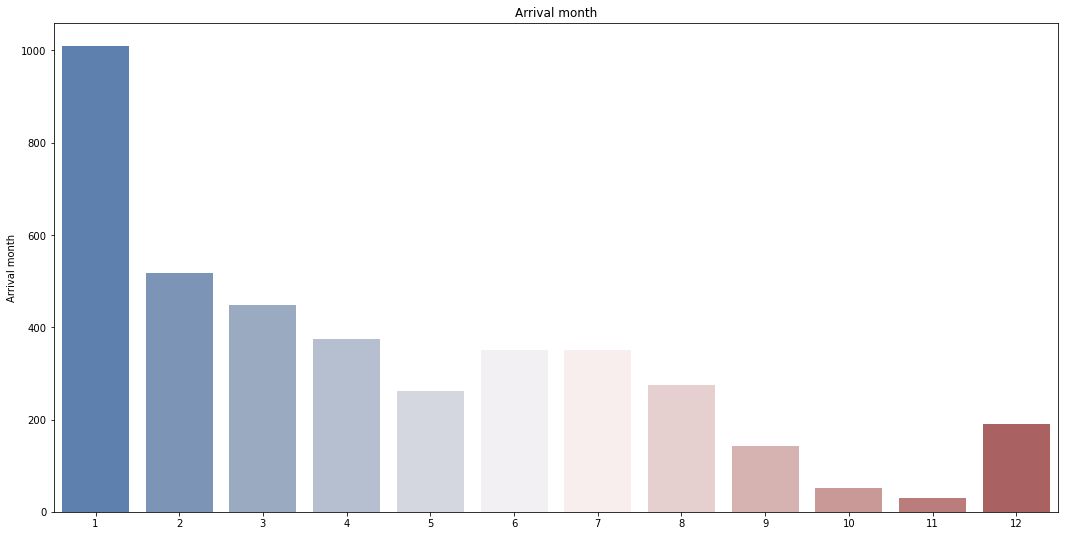

In [335]:
month = reservas['Arrival month'].value_counts()

fg,ax = plt.subplots(figsize=(18,9))

sns.barplot(x=month.index,y=month,palette="vlag",capsize=5.0)
plt.title('Arrival month')

plt.show()

We can observe the data set is unbalanced, so maybe will be interesting droppings this column

## Room type

Room type grouped and with more understable names

In [336]:
roomtype = reservas['Room type'].tolist()

In [337]:
roomtypeok = []

for elem in roomtype:
    if elem == 'DBLDLX':        
        roomtypeok.append(elem.replace(elem,'Double Deluxe'))
    if elem == 'DBLSTD':
        roomtypeok.append(elem.replace(elem,'Double Standard'))
    if elem == 'TPLSTD':
        roomtypeok.append(elem.replace(elem,'Triple Standard'))
    if elem == 'DBLSTDST':
        roomtypeok.append(elem.replace(elem,'Double Standard City View'))
    if elem == 'DBLSUP':
        roomtypeok.append(elem.replace(elem,'Double London Eye view'))
    if elem == 'DBLSTD__2':
        roomtypeok.append(elem.replace(elem,'Double Standard'))
    if elem == 'JRSSTD':
        roomtypeok.append(elem.replace(elem,'Junior Suite'))

In [338]:
len(roomtypeok)

4000

In [339]:
reservas['Room type ok'] = roomtypeok

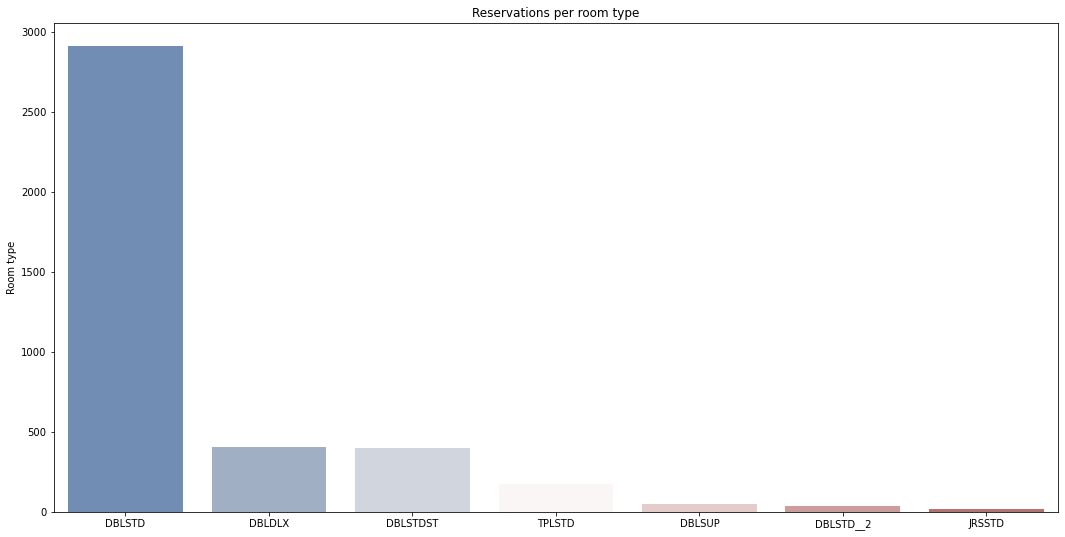

In [340]:
room = reservas['Room type'].value_counts()

fg,ax = plt.subplots(figsize=(18,9))

sns.barplot(x=room.index,y=room,palette="vlag",capsize=7.0)
plt.title('Reservations per room type')

plt.show()

## Status

In [341]:
reservas.dtypes

Reservation No.                  int64
Main client                     object
Arrival date                    object
Departure date                  object
Room type                       object
Status                          object
Meal plan identifier            object
Rate                            object
Creation date                   object
Market channel                  object
Arrival date ok         datetime64[ns]
Departure date ok       datetime64[ns]
Creation date ok        datetime64[ns]
Lenght of the stay               int64
Arrival_day                     object
Departure_day                   object
Delta                           object
Arrival month                    int64
Room type ok                    object
dtype: object

In [342]:
reservas['Status'].unique()

array(['Confirmed', 'Cancelled', 'No show', 'Rejected'], dtype=object)

In [343]:
reservas['Status'].value_counts(dropna=False)

Confirmed    2000
Cancelled    1857
No show       142
Rejected        1
Name: Status, dtype: int64

In [344]:
reservas = reservas[reservas['Status'].isin(['Confirmed','Cancelled'])]

All good with this, ready for one hot encoding

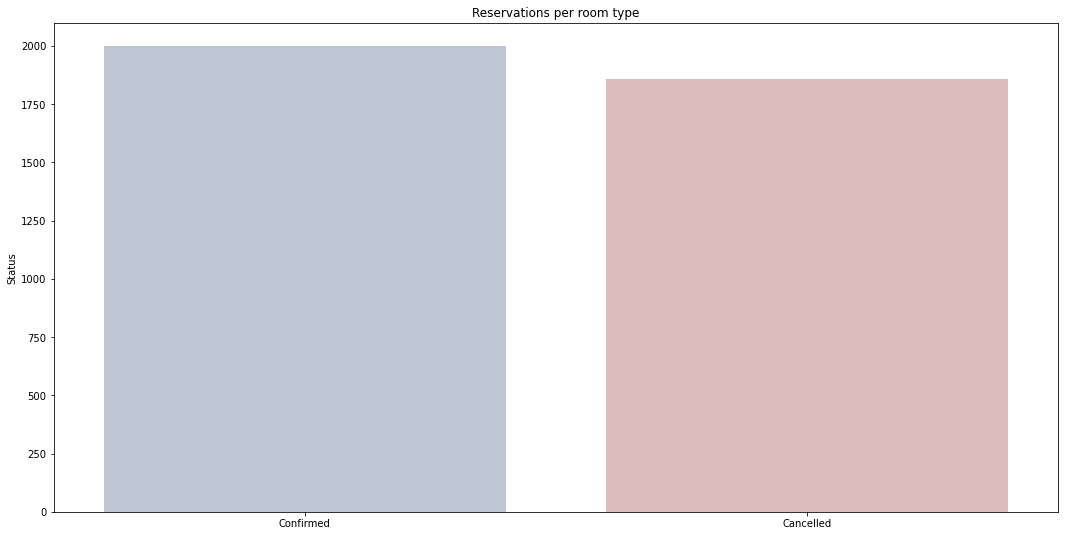

In [345]:
cxl = reservas['Status'].value_counts()

fg,ax = plt.subplots(figsize=(18,9))

sns.barplot(x=cxl.index,y=cxl,palette="vlag",capsize=7.0)
plt.title('Reservations per room type')

plt.show()

## Rate

In [346]:
reservas['Rate'] = reservas['Rate'].fillna('B_BAR')

In [347]:
reservas.isna().sum()

Reservation No.            0
Main client                0
Arrival date               0
Departure date             0
Room type                  0
Status                     0
Meal plan identifier       0
Rate                       0
Creation date           2000
Market channel             0
Arrival date ok            0
Departure date ok          0
Creation date ok        2000
Lenght of the stay         0
Arrival_day                0
Departure_day              0
Delta                      0
Arrival month              0
Room type ok               0
dtype: int64

In [348]:
reservas['Rate'].unique()

array(['BFL_VP_O18', 'X_B_PKNR', 'X_BAR_NR', 'X_BAR_PK', 'X_BAR',
       'W_BAR_ROM', 'W_BAR', 'F_W18_S19', 'X_B_PKNR2', 'W_BAR_NR',
       'B_BAR', 'BFL_VP_S18', 'BFL_SE_O18', 'BFL_BNG199', 'BFL_RED',
       'X_DESTIMO', 'C_160/180', 'BFL_BNG200', 'BFL_VP_818', 'S_GTA_1819',
       'BFL_SE_J18', 'C_150/170R', 'C_155/175', 'C_140/160R', 'BFL_LX7N',
       'C_163/183', 'BFL_LX4N', 'C_164/184', 'C_180/200', 'C_150/170',
       'G_BASE_20', 'B_BAR_NR', 'X_B_PK2', 'C_170/190', 'BFL_VP_D18',
       'W_ITF', 'C_145/165', 'C_180/200R', 'C_138/158', 'C_165/185',
       'C_BAR/10%', 'C_140/160', 'C_145/165R', 'G_IAPS_20'], dtype=object)

Split rates into *Non refundable rate* and *free cancellaton* rate

In [349]:
rates = reservas['Rate'].to_list()

In [350]:
rates

['BFL_VP_O18',
 'BFL_VP_O18',
 'BFL_VP_O18',
 'X_B_PKNR',
 'X_BAR_NR',
 'X_BAR_NR',
 'X_BAR_PK',
 'X_BAR_NR',
 'X_BAR',
 'W_BAR_ROM',
 'X_BAR_NR',
 'W_BAR',
 'F_W18_S19',
 'W_BAR_ROM',
 'X_BAR_NR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR_NR',
 'X_B_PKNR',
 'X_B_PKNR',
 'X_B_PKNR2',
 'W_BAR',
 'W_BAR',
 'F_W18_S19',
 'W_BAR_NR',
 'X_BAR',
 'X_BAR_NR',
 'X_BAR_NR',
 'B_BAR',
 'X_BAR',
 'BFL_VP_O18',
 'BFL_VP_O18',
 'X_B_PKNR',
 'B_BAR',
 'W_BAR_NR',
 'X_B_PKNR',
 'X_BAR_NR',
 'X_BAR',
 'X_BAR_NR',
 'B_BAR',
 'X_BAR',
 'W_BAR_NR',
 'W_BAR_NR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR_NR',
 'X_BAR_NR',
 'X_BAR_NR',
 'X_BAR_NR',
 'X_BAR',
 'X_BAR_NR',
 'X_BAR_NR',
 'X_BAR',
 'X_BAR_NR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR',
 'X_BAR_NR',
 'X_BAR',
 'F_W18_S19',
 'X_BAR_NR',
 'X_BAR',
 'BFL_VP_O18',
 'X_BAR_NR',
 'W_BAR_NR',
 'X_B_PKNR',
 'X_B_PKNR',
 'W_BAR',
 'W_BAR',
 'W_BAR',
 'X_B_PKNR',
 'BFL_VP_O18',

In [351]:
nr = []

for elem in rates:
        
    if "NR" in elem:
        nr.append(elem.replace(elem,'1'))        
    else:
        nr.append(elem.replace(elem,'0'))
        
        
print(len(nr))

3857


In [352]:
nr

['0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1'

In [353]:
reservas['Non Refundable'] = nr

In [354]:
reservas['Non Refundable']

0       0
1       0
2       0
3       1
4       1
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: Non Refundable, Length: 3857, dtype: object

In [355]:
reservas['Non Refundable'] = pd.to_numeric(reservas['Non Refundable'])

In [356]:
reservas['Non Refundable'].unique()

array([0, 1], dtype=int64)

In [357]:
reservas.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date,Market channel,Arrival date ok,Departure date ok,Creation date ok,Lenght of the stay,Arrival_day,Departure_day,Delta,Arrival month,Room type ok,Non Refundable
0,4516548,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT,5,L,L,L-L,12,Double Deluxe,0
1,4517039,VOYAGE PRIVE FRANCIA,27/12/2018,1/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-01,NaT,5,L,L,L-L,12,Double Deluxe,0
2,4520747,VOYAGE PRIVE FRANCIA,27/12/2018,3/1/2019,DBLDLX,Confirmed,BB,BFL_VP_O18,NaN,Flash sales / Boxes,2018-12-27,2019-01-03,NaT,7,L,L,L-L,12,Double Deluxe,0
3,4570451,AGODA COMPANY PTE,27/12/2018,1/1/2019,DBLSTD,Confirmed,RO,X_B_PKNR,NaN,Online Travel agency,2018-12-27,2019-01-01,NaT,5,L,L,L-L,12,Double Standard,1
4,4644589,WIS-WELCOMEBEDS,27/12/2018,2/1/2019,DBLSTD,Confirmed,BB,X_BAR_NR,NaN,Online Travel agency,2018-12-27,2019-01-02,NaT,6,L,L,L-L,12,Double Standard,1


## Meal plan

In [358]:
reservas['Meal plan identifier'].unique()

array(['BB', 'RO', 'HB'], dtype=object)

In [359]:
meal = reservas['Meal plan identifier'].to_list()

# Only cancellations

In [360]:
cxl = reservas[reservas['Status']=='Cancelled']

In [361]:
cxl.head()

,Reservation No.,Main client,Arrival date,Departure date,Room type,Status,Meal plan identifier,Rate,Creation date,Market channel,Arrival date ok,Departure date ok,Creation date ok,Lenght of the stay,Arrival_day,Departure_day,Delta,Arrival month,Room type ok,Non Refundable
2000,4193691,BOOKING.COM,1/1/2019,7/1/2019,DBLSTD,Cancelled,BB,X_BAR,27/7/2018,Online Travel agency,2019-01-01,2019-01-07,2018-07-27,6,L,L,L-L,1,Double Standard,0
2002,4438480,MIKI TRAVEL LTD.,1/1/2019,3/1/2019,TPLSTD,Cancelled,BB,F_W18_S19,8/10/2018,Travel agency,2019-01-01,2019-01-03,2018-10-08,2,L,L,L-L,1,Triple Standard,0
2003,4472440,BOOKING.COM,1/1/2019,13/1/2019,DBLSTD,Cancelled,BB,X_BAR,17/10/2018,Online Travel agency,2019-01-01,2019-01-13,2018-10-17,12,L,W,W-L,1,Double Standard,0
2004,4563806,SUNHOTELS,1/1/2019,6/1/2019,DBLSTD,Cancelled,BB,F_W18_S19,12/11/2018,Tour Operator,2019-01-01,2019-01-06,2018-11-12,5,L,W,W-L,1,Double Standard,0
2005,4567131,SUNHOTELS,1/1/2019,6/1/2019,DBLSTD,Cancelled,BB,F_W18_S19,13/11/2018,Tour Operator,2019-01-01,2019-01-06,2018-11-13,5,L,W,W-L,1,Double Standard,0


## Distribution by month

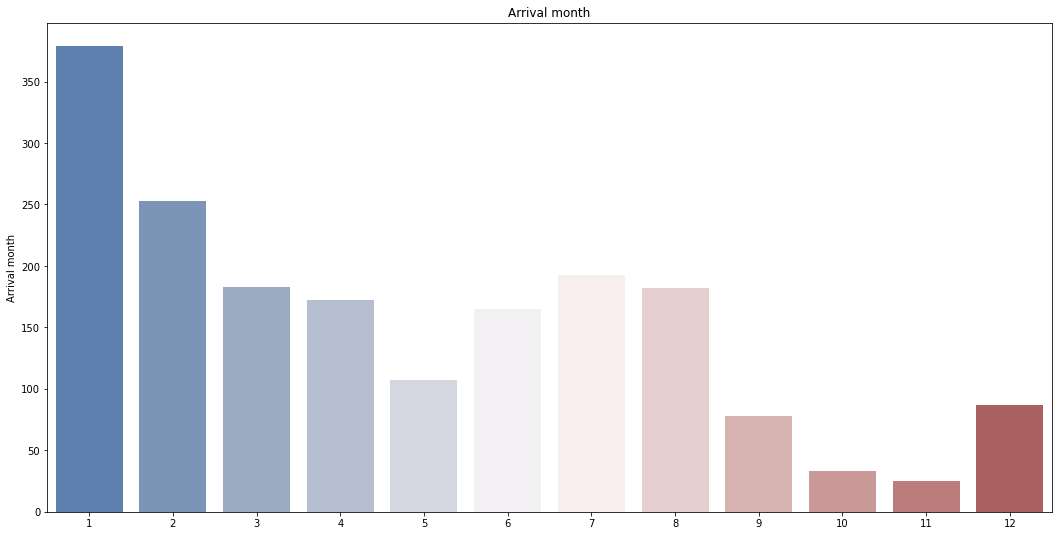

In [362]:
cxlmonth = cxl['Arrival month'].value_counts()

fg,ax = plt.subplots(figsize=(18,9))

sns.barplot(x=cxlmonth.index,y=cxlmonth,palette="vlag",capsize=5.0)
plt.title('Arrival month')

plt.show()

Same distribution / unbalance, we have to drop this column

# Dealing with **N/A's**

In [363]:
reservas.isna().sum().sort_values(ascending=False)

Creation date           2000
Creation date ok        2000
Non Refundable             0
Main client                0
Arrival date               0
Departure date             0
Room type                  0
Status                     0
Meal plan identifier       0
Rate                       0
Market channel             0
Room type ok               0
Arrival date ok            0
Departure date ok          0
Lenght of the stay         0
Arrival_day                0
Departure_day              0
Delta                      0
Arrival month              0
Reservation No.            0
dtype: int64

We are going to drop creation date and creation date ok, so there will be no null values

# Pre-proccessing

In [364]:
reservas.dtypes

Reservation No.                  int64
Main client                     object
Arrival date                    object
Departure date                  object
Room type                       object
Status                          object
Meal plan identifier            object
Rate                            object
Creation date                   object
Market channel                  object
Arrival date ok         datetime64[ns]
Departure date ok       datetime64[ns]
Creation date ok        datetime64[ns]
Lenght of the stay               int64
Arrival_day                     object
Departure_day                   object
Delta                           object
Arrival month                    int64
Room type ok                    object
Non Refundable                   int64
dtype: object

reservas.columns

In [365]:
reservas = reservas.drop(columns=['Room type','Reservation No.', 'Main client', 'Arrival date',
                                  'Departure date', 'Arrival_day','Departure_day',
       'Rate', 'Creation date','Arrival date ok', 'Departure date ok',
       'Creation date ok', 'Arrival month'])

In [366]:
reservas.dtypes

Status                  object
Meal plan identifier    object
Market channel          object
Lenght of the stay       int64
Delta                   object
Room type ok            object
Non Refundable           int64
dtype: object

In [367]:
reservas.head()

,Status,Meal plan identifier,Market channel,Lenght of the stay,Delta,Room type ok,Non Refundable
0,Confirmed,BB,Flash sales / Boxes,5,L-L,Double Deluxe,0
1,Confirmed,BB,Flash sales / Boxes,5,L-L,Double Deluxe,0
2,Confirmed,BB,Flash sales / Boxes,7,L-L,Double Deluxe,0
3,Confirmed,RO,Online Travel agency,5,L-L,Double Standard,1
4,Confirmed,BB,Online Travel agency,6,L-L,Double Standard,1


In [368]:
reservas.to_csv(r'../data/rvas_ok.csv')

---

## **One Hot Encoding**

In [369]:
reservas = pd.read_csv(r'../data/rvas_ok.csv', index_col = 0)

In [370]:
reservas.head()

,Status,Meal plan identifier,Market channel,Lenght of the stay,Delta,Room type ok,Non Refundable
0,Confirmed,BB,Flash sales / Boxes,5,L-L,Double Deluxe,0
1,Confirmed,BB,Flash sales / Boxes,5,L-L,Double Deluxe,0
2,Confirmed,BB,Flash sales / Boxes,7,L-L,Double Deluxe,0
3,Confirmed,RO,Online Travel agency,5,L-L,Double Standard,1
4,Confirmed,BB,Online Travel agency,6,L-L,Double Standard,1


In [384]:
reservas = pd.get_dummies(reservas,drop_first=True)

In [385]:
reservas.head()

,Lenght of the stay,Non Refundable,Status_Cancelled,Status_Confirmed,Meal plan identifier_BB,Meal plan identifier_HB,Meal plan identifier_RO,Market channel_Corporate/Mice,Market channel_Direct reservation / Walk-in,Market channel_Flash sales / Boxes,...,Delta_L-L,Delta_L-W,Delta_W-L,Delta_W-W,Room type ok_Double Deluxe,Room type ok_Double London Eye view,Room type ok_Double Standard,Room type ok_Double Standard City View,Room type ok_Junior Suite,Room type ok_Triple Standard
0,5,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,5,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,7,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,5,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,6,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Correlation matrix

In [386]:
reservas.columns

Index(['Lenght of the stay', 'Non Refundable', 'Status_Cancelled',
       'Status_Confirmed', 'Meal plan identifier_BB',
       'Meal plan identifier_HB', 'Meal plan identifier_RO',
       'Market channel_Corporate/Mice',
       'Market channel_Direct reservation / Walk-in',
       'Market channel_Flash sales / Boxes',
       'Market channel_Global Distribution Systems (GDS)',
       'Market channel_Last minmute app',
       'Market channel_Online Travel agency', 'Market channel_Tour Operator',
       'Market channel_Travel agency', 'Delta_L-L', 'Delta_L-W', 'Delta_W-L',
       'Delta_W-W', 'Room type ok_Double Deluxe',
       'Room type ok_Double London Eye view', 'Room type ok_Double Standard',
       'Room type ok_Double Standard City View', 'Room type ok_Junior Suite',
       'Room type ok_Triple Standard'],
      dtype='object')

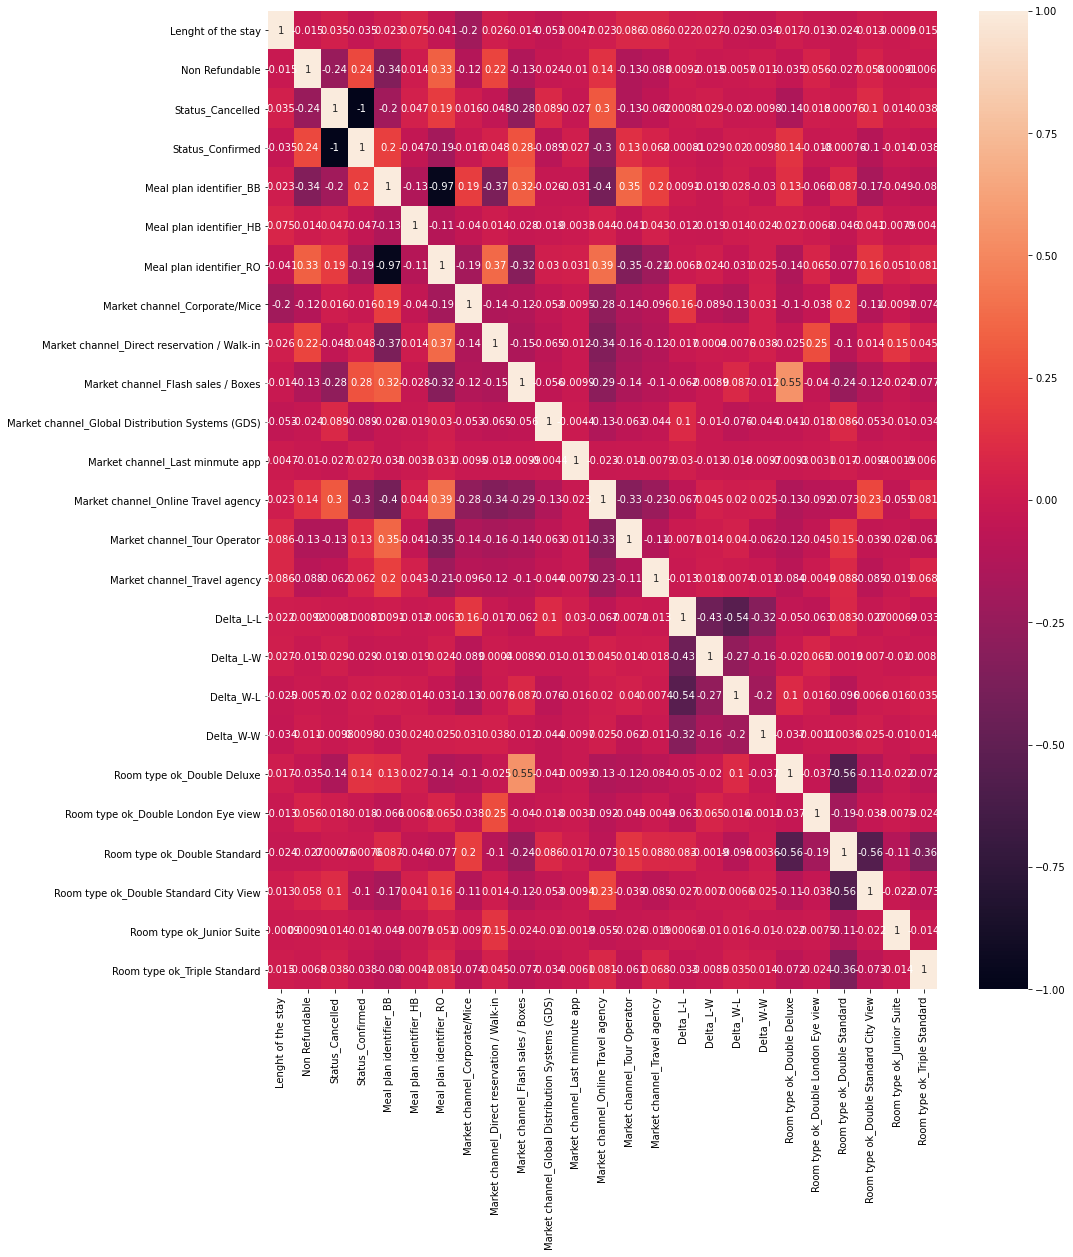

In [387]:
corrMatrix = reservas.corr()

fg,ax = plt.subplots(figsize=(15,18))
sns.heatmap(corrMatrix, annot=True)
plt.show()

The Correlation matrix is not useful when all our variables are categorical

---

# Modelling

In [388]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [402]:
X = reservas.drop(columns=['Status_Cancelled','Status_Confirmed'])

y = reservas['Status_Cancelled']

In [403]:
clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':list(range(1,20)),'weights':['uniform','distance']},cv=10)

clf.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [404]:
clf.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [405]:
clf.best_score_

0.6505228450306171

In [406]:
clf.cv_results_

{'mean_fit_time': array([0.0316957 , 0.03370194, 0.0345022 , 0.03110378, 0.02820263,
        0.02499671, 0.02930307, 0.02749939, 0.02695408, 0.02935202,
        0.02840216, 0.02649791, 0.02690353, 0.02570074, 0.02550082,
        0.02699857, 0.02570348, 0.02770276, 0.02559834, 0.02585461,
        0.02409925, 0.02820168, 0.02624695, 0.02810457, 0.02720146,
        0.02754893, 0.02749403, 0.025699  , 0.04450073, 0.03179812,
        0.0321969 , 0.03039916, 0.02890208, 0.02740006, 0.02989833,
        0.02880349, 0.03641028, 0.05511227]),
 'std_fit_time': array([0.00686925, 0.00989103, 0.01179235, 0.00539283, 0.00381724,
        0.00286336, 0.00538714, 0.00338364, 0.00352618, 0.00552165,
        0.00443137, 0.00241801, 0.00288054, 0.00371553, 0.00237628,
        0.00325676, 0.00296798, 0.00479372, 0.00127688, 0.00223792,
        0.00288042, 0.00342793, 0.00304518, 0.00327398, 0.00345843,
        0.00281309, 0.00349393, 0.00319255, 0.01205416, 0.01087137,
        0.00960329, 0.00810242, 0.003

In [410]:
from sklearn.preprocessing import StandardScaler

In [413]:
transformer = StandardScaler()

transformer.fit(X)

X_scaled = transformer.transform(X)

In [414]:
clf.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [415]:
clf.best_score_

0.6515658434829419